#Stock Market Analysis & Prediction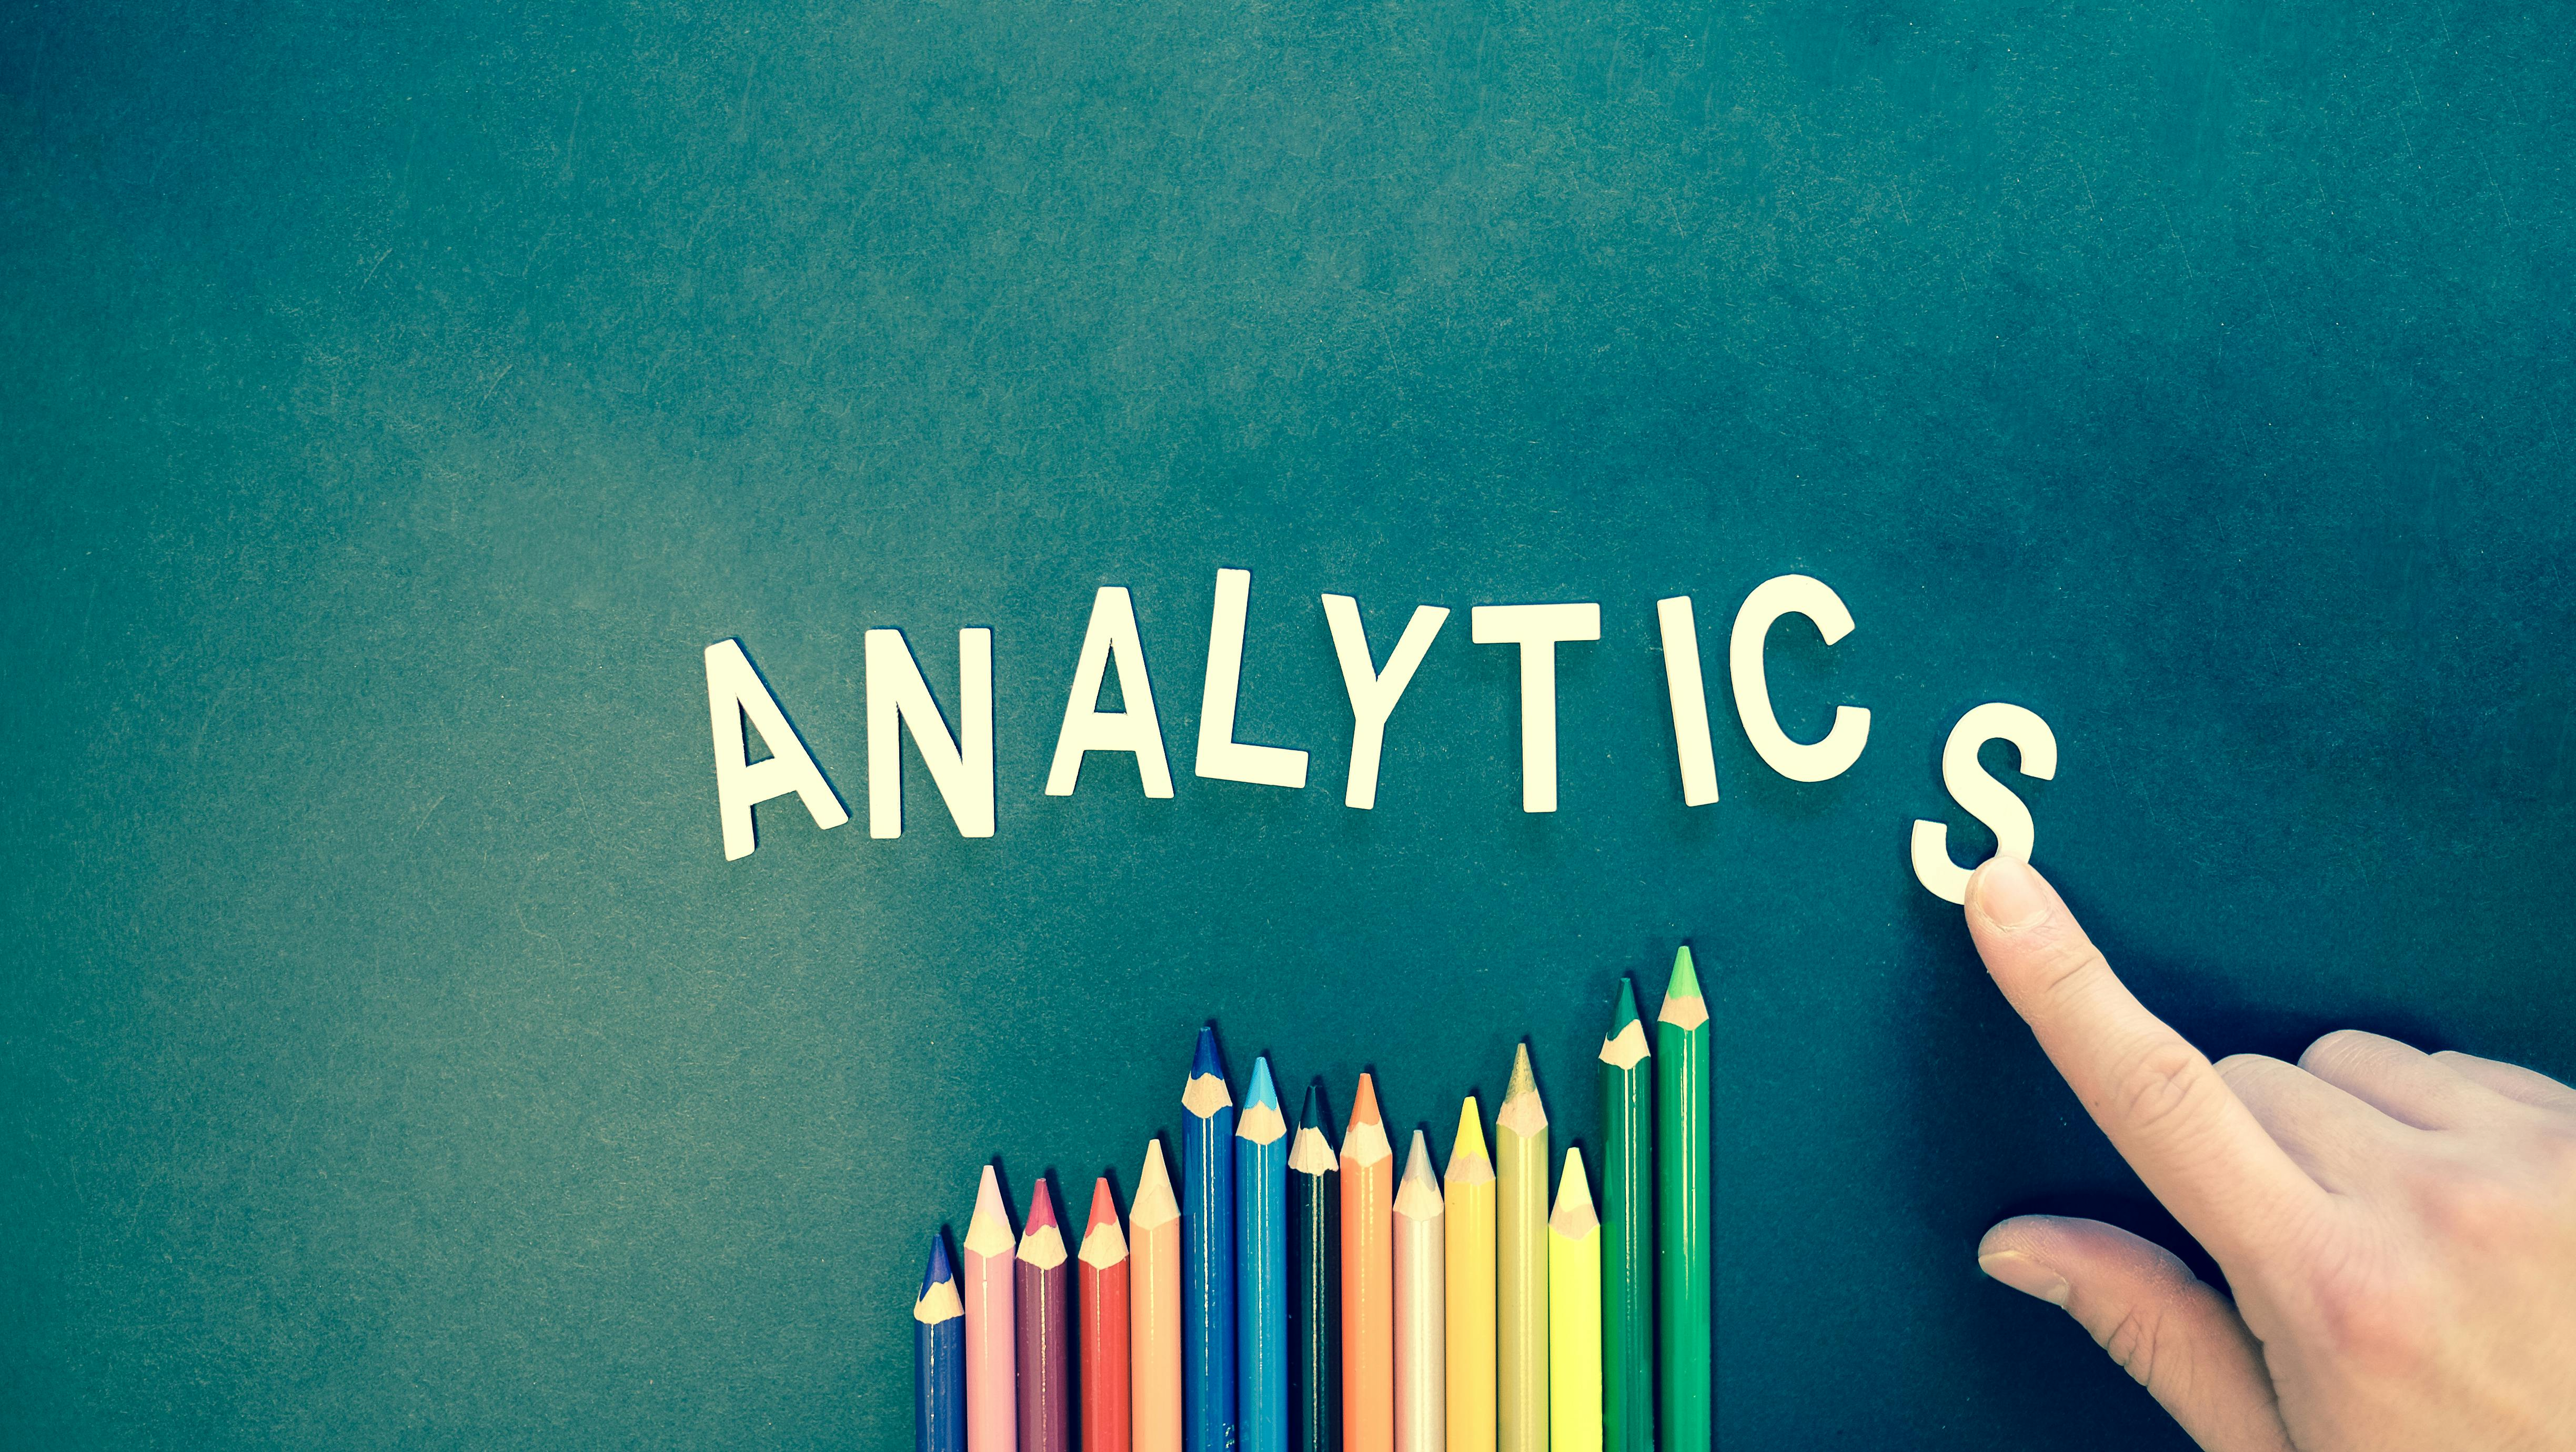

##About Dataset

This dataset provides historical data of TESLA INC. stock (TSLA). The data is available at a daily level. Currency is USD

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

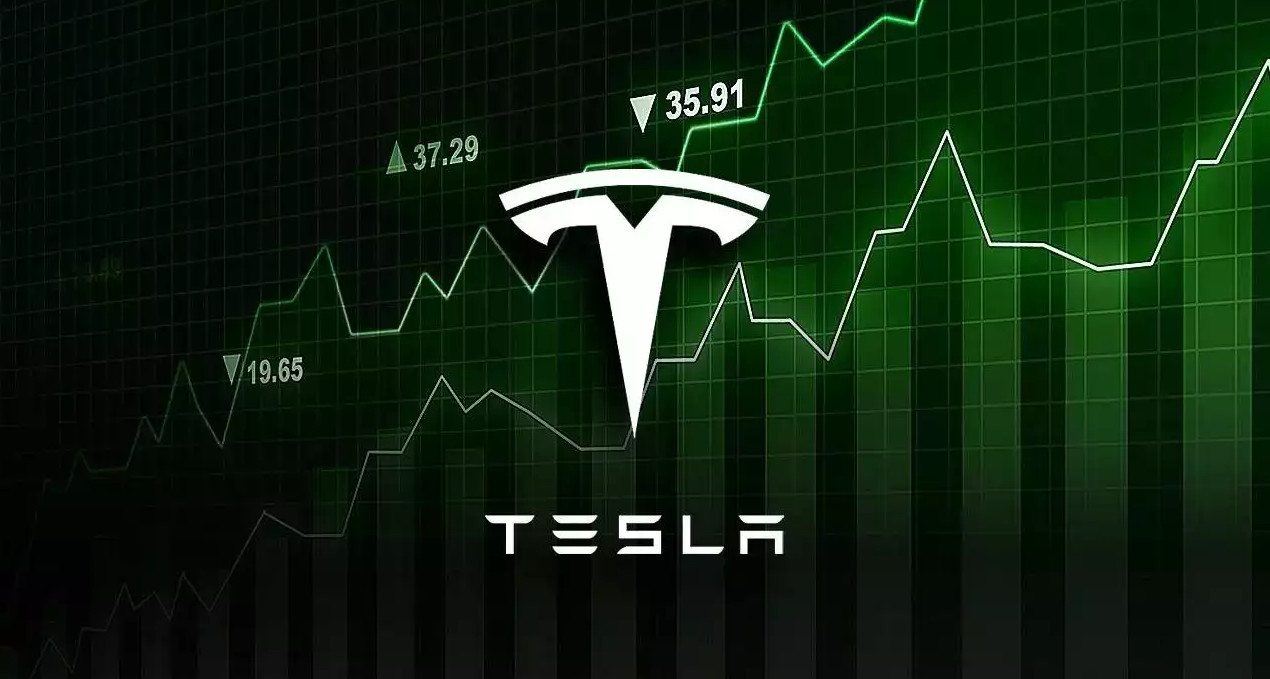

In [ ]:
import pandas as pd

# read  Data set
df = pd.read_csv('/content/TSLA.csv')

# Print the first few rows of the DataFrame to check if it loaded correctly
print(df.head())
df.info()

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


# why Box plot?

*   Box plots, also known as box and whisker plots, are used to summarize and visualize data in a variety of ways.


*  Box plots can be used to compare different sets of data by drawing multiple box plots on the same graph.

  






<Axes: >

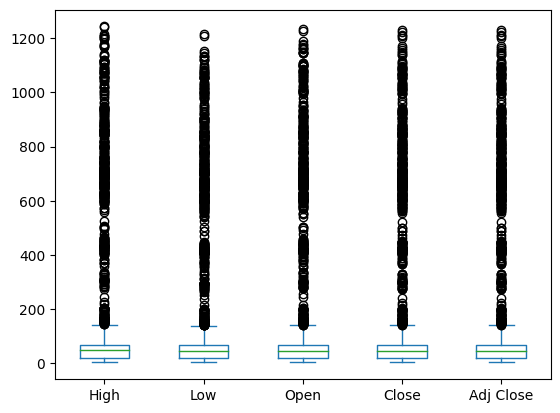

In [ ]:
df[['High', 'Low', 'Open','Close','Adj Close']].plot(kind='box')

<Figure size 1200x600 with 0 Axes>

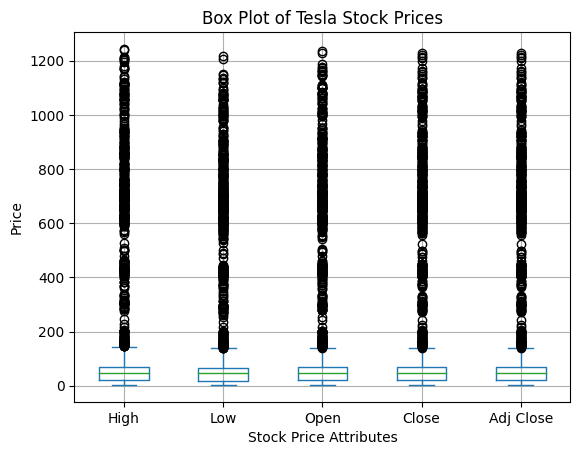

In [ ]:
# plot the graph on setting the layout

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
df[['High', 'Low', 'Open', 'Close', 'Adj Close']].plot(kind='box')
plt.title('Box Plot of Tesla Stock Prices')
plt.ylabel('Price')
plt.xlabel('Stock Price Attributes')
plt.grid(True)
plt.show()


##Why use linear regression  for prediction?


*  Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values

* The key idea behind Linear Regression is to find a linear equation that best fits the data.  





In [ ]:
#build the regression model
from sklearn.model_selection import train_test_split
#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
# for preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
# Split the data into training and testing sets
X = df[['Open', 'High', 'Low', 'Volume']]  # Features (independent variables)
y = df['Close']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#create  a linear model
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

## Make predictions


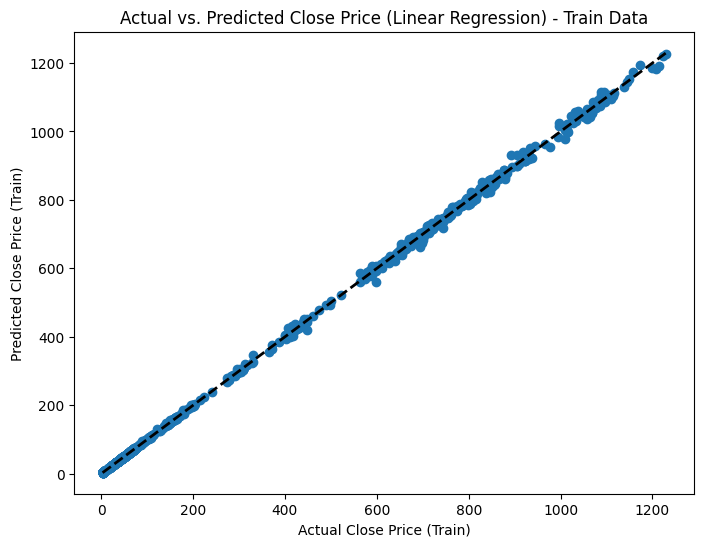

In [ ]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Plot the actual vs. predicted values for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Close Price (Train)")
plt.ylabel("Predicted Close Price (Train)")
plt.title("Actual vs. Predicted Close Price (Linear Regression) - Train Data")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()


##  Calculate score for model evaluation

In [ ]:


# Calculate the R-squared score for the training set
train_r2 = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R-squared score for the test set
test_r2 = r2_score(y_test, y_test_pred)


print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Training R-squared: 0.9997558900029175
Test R-squared: 0.9996490747211834
